### Introduction
The New York Times reports that "Twitter is now the place where public officials make statements, activists pressure politicians, and reporters announce their latest scoops." Twitter has an estimated 330,000 users in New Zealand, with the majority of users being young adults aged 18 to 29, implying that there is one Twitter user for every 15 New Zealanders. It's interesting to see what issues are now trending and what sentiments New Zealanders have expressed on Twitter. Especially during the COVID 19.

In [ ]:
import pandas as pd
import numpy as np


import nltk

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option("display.max_colwidth", 400)
data_origin = pd.read_csv('D:/internship/twitter/twitter_data.csv', encoding= 'ISO-8859-1',parse_dates=['date_created'])
data_origin

In [ ]:
"Step I ## # Data cleaning "

data_clean=data_origin
data_clean.keys()

Index(['DOCID', 'body', 'date_created', 'handle', 'name'], dtype='object')

In [ ]:
## libraries for string
import re
import spacy
import string

'''round I - strip punctuation , normalise to lower case, double spacing, '''

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''

    my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
    text = text.lower()
   # text = re.sub('\s+',' ', text) #remove double spacing
    text = re.sub('['+my_punctuation + ']+', ' ', text)
    text = re.sub('([0-9]+)', '', text) # remove numbers
    return text
round1 = lambda x: clean_text_round1(x)

In [ ]:
data_clean['body'] = data_clean['body'].apply(round1)
data_clean['body']

0                   some people with underlying medical conditions or those  and older are more at risk of severe illness from covid  \n\nthese people may need to take extra precautions like only reconnecting with close family \n\nfor more information  covid govt nz at risk people
1          meet the makrava family \n\nthis week is rotuman language week   lalum  äe  e gasav ne fäeag rotu m te is  \n\nthe ministry for  pacific peoples shares the latest covid  information in  pacific languages on three   friday at pm and on their facebook page this thursday 
2               in alert level   hairdressers and barbers can reopen  to the bubble barbers out there  thanks for standing in for the professionals during lockdown   \n\nhow s your do looking  we d love to see photos of your stay home style woman getting haircutman getting haircut
3                                                                                                                                                         

In [ ]:
##round II stop words , string length less than 3

import nltk

from nltk.corpus import stopwords
stop_words = stopwords.words('english')


# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove stopwords from the text
data_clean['body'] = [remove_stopwords(r.split()) for r in data_clean['body']]
data_clean['body']

# remove short words (length < 3)

data_clean['body']= data_clean['body'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
data_clean['body']



0                         people underlying medical conditions older risk severe illness covid people may need take extra precautions like reconnecting close family information covid govt risk people
1                  meet makrava family week rotuman language week lalum gasav fäeag rotu ministry pacific peoples shares latest covid information pacific languages three friday facebook page thursday
2                        alert level hairdressers barbers reopen bubble barbers thanks standing professionals lockdown looking love see photos stay home style woman getting haircutman getting haircut
3                                                                                                                                 watch live ashley bloomfield jacinda ardern government covid response
4                                                    latest update prime minister director general health today reporting new cases covid todays combined total confirmed probable covid cases remains


In [ ]:
"Exploratory Data Analysis"
from nltk import FreqDist
# function to plot most frequent n terms
def freq_words(x, n):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = n)
  plt.figure(figsize=(n,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

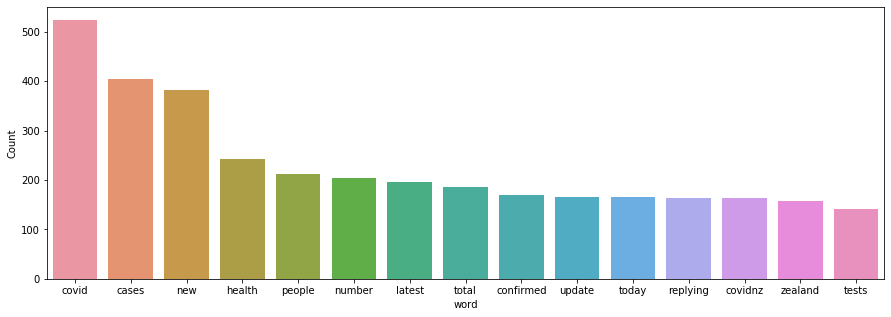

In [ ]:
freq_words(data_clean['body'],15)

In [ ]:
"Step II : Tokenising, lemmatisation and Stemming"

from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer(strip_handles=True)
data_clean['body']= data_clean['body'].apply(tt.tokenize)
data_clean['body']


0                            [people, underlying, medical, conditions, older, risk, severe, illness, covid, people, may, need, take, extra, precautions, like, reconnecting, close, family, information, covid, govt, risk, people]
1                    [meet, makrava, family, week, rotuman, language, week, lalum, gasav, fäeag, rotu, ministry, pacific, peoples, shares, latest, covid, information, pacific, languages, three, friday, facebook, page, thursday]
2                            [alert, level, hairdressers, barbers, reopen, bubble, barbers, thanks, standing, professionals, lockdown, looking, love, see, photos, stay, home, style, woman, getting, haircutman, getting, haircut]
3                                                                                                                                                   [watch, live, ashley, bloomfield, jacinda, ardern, government, covid, response]
4                                                       [latest, update, prime, minister

In [ ]:
## lemmatisation
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
def word_lemma (text):
    lema_text = [lemmatizer.lemmatize(i)for i in text]
    #lema_text = " ".join([lemmatizer.lemmatize(i)for i in text])
    return lema_text

data_clean['body']= data_clean['body'].apply (lambda x:word_lemma(x))

review_2 = data_clean['body']
data_clean['body']

0                       [people, underlying, medical, condition, older, risk, severe, illness, covid, people, may, need, take, extra, precaution, like, reconnecting, close, family, information, covid, govt, risk, people]
1                [meet, makrava, family, week, rotuman, language, week, lalum, gasav, fäeag, rotu, ministry, pacific, people, share, latest, covid, information, pacific, language, three, friday, facebook, page, thursday]
2                          [alert, level, hairdresser, barber, reopen, bubble, barber, thanks, standing, professional, lockdown, looking, love, see, photo, stay, home, style, woman, getting, haircutman, getting, haircut]
3                                                                                                                                            [watch, live, ashley, bloomfield, jacinda, ardern, government, covid, response]
4                                                  [latest, update, prime, minister, director, general, health, toda

In [ ]:
#freq_words(data_clean['body'],15)
#data_clean['body']= data_clean['body'].apply(tt.tokenize)

In [ ]:
def word_stemmer (text):
    stem_text = " ".join ([stemmer.stem(i)for i in text])
    return stem_text

data_clean['body']= data_clean['body'].apply (lambda x:word_stemmer(x))

data_clean['body']

0                                  peopl underli medic condit older risk sever ill covid peopl may need take extra precaut like reconnect close famili inform covid govt risk peopl
1             meet makrava famili week rotuman languag week lalum gasav fäeag rotu ministri pacif peopl share latest covid inform pacif languag three friday facebook page thursday
2                             alert level hairdress barber reopen bubbl barber thank stand profession lockdown look love see photo stay home style woman get haircutman get haircut
3                                                                                                                  watch live ashley bloomfield jacinda ardern govern covid respons
4                                              latest updat prime minist director gener health today report new case covid today  s combin total confirm probabl covid case remain
                                                                                           ...      

C:\Users\Mahe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Mahe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 146 missing from current font.
  font.load_char(ord(s), flags=flags)


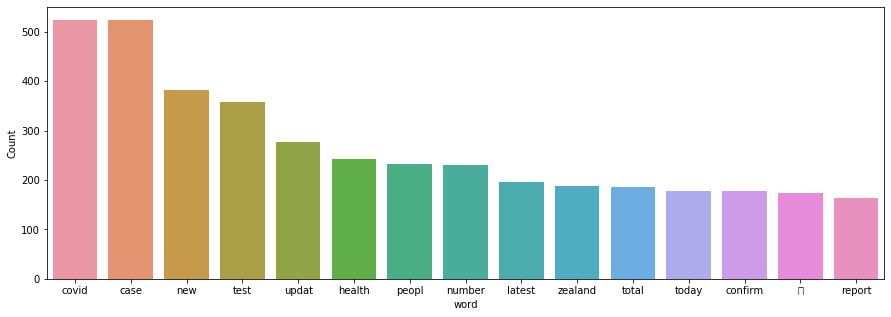

In [ ]:
freq_words(data_clean['body'],15)

In [ ]:
review_2 = review_2.map(lambda x: x.split(''))

ValueError: empty separator

In [ ]:
dictionary = corpora.Dictionary(review_2)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [ ]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in review_2]
doc_term_matrix.sort()

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=17, random_state=100,
                chunksize=1000, passes=50)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis